# We will use kNN to predict the type of Breast Cancer in the Breast Cancer Wisconsin(Diagnostic)Data

In [2]:
#Import Libraries

In [3]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Load and review Data

In [4]:
bcData = pd.read_csv("C:/Users/taham/Desktop/7th semester/AI by Sir Ayyaz/Assignments/Titanic_data_Set.csv")

In [5]:
bcData.shape

(891, 8)

In [6]:
bcData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Fare           float64
Age            float64
SibSp            int64
Parch            int64
dtype: object

In [8]:
# bcData['diagnosis'] = bcData.diagnosis.astype('category')


In [7]:
# bcData.describe().transpose()


In [8]:
bcData.groupby(["Survived"]).count()

# Class distribution among B and M is almost 2:1. The model will better predict B and M

,PassengerId,Pclass,Sex,Fare,Age,SibSp,Parch
Survived,,,,,,,
0,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342


drop the first column from the data frame. This is Id column which is not used in modeling

In [30]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.

# bcData = bcData.drop(labels = "id", axis = 1)


In [9]:
bcData.shape

(891, 8)

In [10]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = bcData.drop(labels= "Survived" , axis = 1)
y = bcData["Survived"]
X.head()


,PassengerId,Pclass,Sex,Fare,Age,SibSp,Parch
0,1,3,1,7.2500,22.0,1,0
1,2,1,2,71.2833,38.0,1,0
2,3,3,2,7.9250,26.0,0,0
3,4,1,2,53.1000,35.0,1,0
4,5,3,1,8.0500,35.0,0,0


In [11]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,PassengerId,Pclass,Sex,Fare,Age,SibSp,Parch
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.517004e-17,-2.031048e-16,4.059603e-16,-4.373606e-17,1.696486e-16,3.456519e-16,6.716164e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.730108e+00,-1.566107e+00,-7.376951e-01,-6.484217e-01,-2.017571e+00,-4.745452e-01,-4.736736e-01
25%,-8.650540e-01,-3.693648e-01,-7.376951e-01,-4.891482e-01,-6.199625e-01,-4.745452e-01,-4.736736e-01
50%,0.000000e+00,8.273772e-01,-7.376951e-01,-3.573909e-01,-1.316416e-01,-4.745452e-01,-4.736736e-01
75%,8.650540e-01,8.273772e-01,1.355574e+00,-2.424635e-02,6.092591e-01,4.327934e-01,-4.736736e-01
max,1.730108e+00,8.273772e-01,1.355574e+00,9.667167e+00,3.370798e+00,6.784163e+00,6.974147e+00


In [12]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

# Build kNN Model

In [20]:
NNH = KNeighborsClassifier(n_neighbors= 5  )


In [18]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train, y_train, y_test)

TypeError: fit() takes 3 positional arguments but 5 were given

# Evaluate Performance of kNN Model

In [21]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [22]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["M", "B"])

df_cm = pd.DataFrame(cm, index = [i for i in ["M","B"]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Confusion Matrix


NameError: name 'predicted_labels' is not defined

# Choosing the K-Value

In [24]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

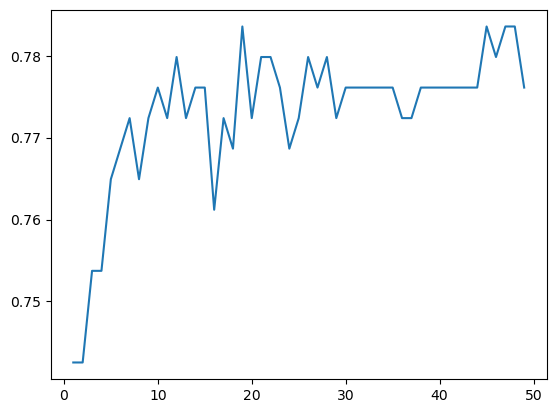

In [25]:
plt.plot(range(1,50),scores)